In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from PIL import Image, ImageStat
%matplotlib inline

In [147]:
train = pd.read_csv('./data/train.csv')
initial_train = train.copy()
train.head()

,Id,Target,Duration,Language,Country,Rating,Action,Adventure,Animation,Biography,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Poster
0,1,0,139,English,France,PG-13,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1.jpg
1,2,0,90,English,USA,R,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.jpg
2,3,0,103,Mandarin,China,R,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.jpg
3,4,0,108,Dzongkha,Australia,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.jpg
4,5,0,122,English,USA,PG-13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.jpg


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 28 columns):
Id             3635 non-null int64
Target         3635 non-null int64
Duration       3635 non-null int64
Language       3629 non-null object
Country        3635 non-null object
Rating         3522 non-null object
Action         3635 non-null int64
Adventure      3635 non-null int64
Animation      3635 non-null int64
Biography      3635 non-null int64
Crime          3635 non-null int64
Documentary    3635 non-null int64
Drama          3635 non-null int64
Family         3635 non-null int64
Fantasy        3635 non-null int64
History        3635 non-null int64
Horror         3635 non-null int64
Music          3635 non-null int64
Musical        3635 non-null int64
Mystery        3635 non-null int64
News           3635 non-null int64
Romance        3635 non-null int64
Sci-Fi         3635 non-null int64
Sport          3635 non-null int64
Thriller       3635 non-null int64
War            

Преобразуем категориальный признак `Language`

In [37]:
train['Language'].describe()

count        3629
unique         41
top       English
freq         3395
Name: Language, dtype: object

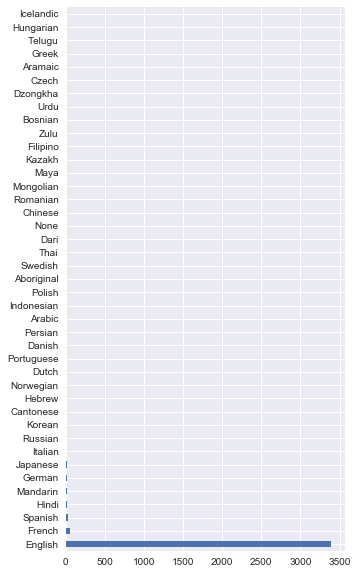

In [38]:
plt.figure(figsize=(5,10))
train['Language'].value_counts().plot.barh()

In [39]:
def transform_lang(df, encoder = None):
    df['Language'] = df['Language'].fillna('None')
    if encoder is None:
        encoder = LabelBinarizer()
        encoder.fit(df['Language'])
    values = encoder.transform(df['Language'])
    return (pd.concat([df.drop(['Language'], axis=1), pd.DataFrame(columns=encoder.classes_, data=values)], axis=1), encoder)

In [40]:
train, lang_encoder = transform_lang(train)

In [41]:
train.head()

,Id,Target,Duration,Country,Rating,Action,Adventure,Animation,Biography,Crime,...,Polish,Portuguese,Romanian,Russian,Spanish,Swedish,Telugu,Thai,Urdu,Zulu
0,1,0,139,France,PG-13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,90,USA,R,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,103,China,R,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,108,Australia,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,122,USA,PG-13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Преобразуем категориальный признак `Country`

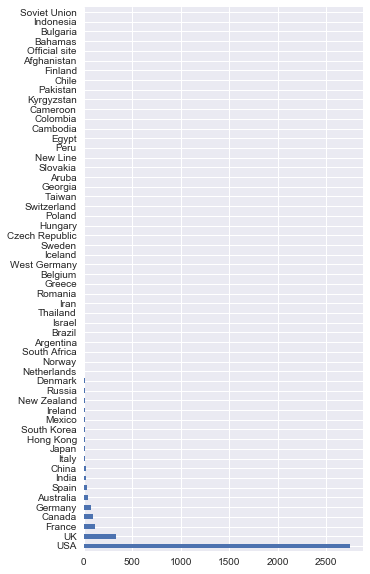

In [42]:
plt.figure(figsize=(5,10))
train['Country'].value_counts().plot.barh()

In [43]:
def transform_country(df, encoder = None):
    df['Country'] = df['Country'].fillna('None')
    if encoder is None:
        encoder = LabelBinarizer()
        encoder.fit(df['Country'])
    values = encoder.transform(df['Country'])
    return (pd.concat([df.drop(['Country'], axis=1), pd.DataFrame(columns=encoder.classes_, data=values)], axis=1), encoder)

In [44]:
train, country_encoder = transform_country(train)

In [45]:
train.head()

,Id,Target,Duration,Rating,Action,Adventure,Animation,Biography,Crime,Documentary,...,South Korea,Soviet Union,Spain,Sweden,Switzerland,Taiwan,Thailand,UK,USA,West Germany
0,1,0,139,PG-13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,90,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,103,R,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,108,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,122,PG-13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Columns: 123 entries, Id to West Germany
dtypes: int32(97), int64(24), object(2)
memory usage: 2.1+ MB


Рассмотрим оставшиеся нечисловые данные

In [47]:
train.select_dtypes(include=['object']).columns

Index(['Rating', 'Poster'], dtype='object')

Обработаем `Rating`

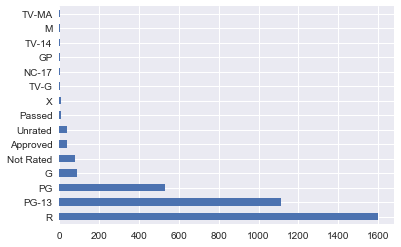

In [48]:
train['Rating'].value_counts().plot.barh()

Обобщим данные согласно этим данным https://en.wikipedia.org/wiki/Motion_picture_content_rating_system

In [51]:
def transform_rating_cell(rating):
    if rating in ['GP', 'Unrated', 'Passed', 'Not Rated', 'Approved', 'G']:
        return 'White'
    elif rating in ['TV-G', 'PG']:
        return 'Yellow'
    elif rating in ['M', 'TV-14', 'PG-13']:
        return 'Purple'
    elif rating in ['R']:
        return 'Red'
    elif rating in ['TV-MA', 'NG-17', 'X']:
        return 'Black'
    else:
        return 'None'
    
def transform_rating(df, encoder = None):
    df['Rating'] = df['Rating'].apply(transform_rating_cell)
    if encoder is None:
        encoder = LabelBinarizer()
        encoder.fit(df['Rating'])
    values = encoder.transform(df['Rating'])
    return (pd.concat([df.drop(['Rating'], axis=1), pd.DataFrame(columns=encoder.classes_, data=values)], axis=1), encoder)

In [52]:
train, rating_encoder = transform_rating(train)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Columns: 128 entries, Id to Yellow
dtypes: int32(103), int64(24), object(1)
memory usage: 2.1+ MB


Опишем весь пайплан преобразования в одном методе

In [119]:
def transform(df, encoders = {'lang': None, 'country': None, 'rating': None}):
    df_copy = df.copy()
    df_copy, encoders['country'] = transform_country(df_copy, encoders['country'])
    df_copy, encoders['lang'] = transform_lang(df_copy, encoders['lang'])
    df_copy, encoders['rating'] = transform_rating(df_copy, encoders['rating'])
    return df_copy, encoders

In [169]:
train, _ = transform(initial_train)
test = train['Target']
train = train.drop(['Poster', 'Target'], axis=1)

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Columns: 126 entries, Id to Yellow
dtypes: int32(103), int64(23)
memory usage: 2.1 MB


### Построим baseline c помощью логистической регрессии

In [171]:
def base_line(train, test):
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=0)
    est = LogisticRegression()
    est.fit(X_train, y_train)
    return roc_auc_score(y_test, est.predict_proba(X_test)[:,1])

In [172]:
base_line(train, test)

0.88340814312545768

Выделим данные из изображенией

In [173]:
def get_brightness(img_path):
    im = Image.open(img_path).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

def transform_image(df):
    df_copy = df.copy()
    df_copy['Poster'] = df['Poster'].apply(lambda p: get_brightness(os.path.join('.', 'data', 'posters', p)))
    return df_copy

In [174]:
train, _ = transform(initial_train)
train = transform_image(train)
test = train['Target']
train = train.drop(['Target'], axis=1)

In [175]:
base_line(train, test)

0.88755451564638832